In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [26]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import progressbar
import json
import pandas as pd

np.random.seed(584)

In [27]:
review_json = open('../yelp-dataset/yelp_academic_dataset_review.json',encoding="utf8")


In [28]:
num_reviews=1000000
reviews_list = list()
user_dict = {}
business_dict = {}
count_u = 0
count_b = 0


In [29]:
for i, line in enumerate(review_json):
    if i == num_reviews:
        break
    data = json.loads(line)
    # extract fields

    review_id = data['review_id']
    
        
    user_id = data['user_id']

    business_id = data['business_id']
    
    stars = data['stars']
    if user_id not in user_dict:
        user_dict[user_id] = count_u
        count_u += 1
    if business_id not in business_dict:
        business_dict[business_id] = count_b
        count_b += 1
    # add to the data
    reviews_list.append([review_id,user_id,business_id,stars])
  
    
df_review = pd.DataFrame(reviews_list, columns=['review_id','user_id','business_id','stars'])
print(df_review)
print("Users:")
print(count_u)
print("Businesses")
print(count_b)


                     review_id                 user_id  \
0       Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA   
1       GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg   
2       2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw   
3       yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg   
4       11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ   
...                        ...                     ...   
999995  YYW_A_KNbjZg3hiDYwrgVQ  xceJT1G2Yhel3W2lRxRTDA   
999996  ZCgKS8NIg3xIlIlGt_HEuQ  4TCOItk-gIJROyNA5ftZ-Q   
999997  5_xWTfueFODk1a_DExOdiw  lLaBZ1rj4ix2gDm7TBTfiQ   
999998  YUEH9xGb8kzYoQbEgdo3Ow  munwYMyAjs_Dg9LI9t38Qw   
999999  yS0Fgp9qpYdznVBLcH05pQ  WIA4cYshdcmGfkm5hqzC_w   

                   business_id  stars  
0       ujmEBvifdJM6h6RLv4wQIg    1.0  
1       NZnhc2sEQy3RmzKTZnqtwQ    5.0  
2       WTqjgwHlXbSFevF32_DJVw    5.0  
3       ikCg8xy5JIg_NGPx-MSIDA    5.0  
4       b1b1eb3uo-w561D0ZfCEiQ    1.0  
...                        ...    ...  
999995  gAWY4P6a9YoWrWT

In [30]:
user_friends = pd.read_json('../yelp-dataset/yelp_academic_dataset_user.json', lines=True)


In [31]:
user_friends = user_friends[['user_id','friends']]

In [32]:
df_review_users = df_review.merge(user_friends, on=['user_id'], how='left')
del user_friends

In [33]:
df_review_users.loc[df_review_users['friends'] == 'None', 'friends'] = ''
df_review_copy = df_review_users[['user_id','business_id']]
df_review_copy=df_review_copy.groupby(['user_id', 'business_id']).size().reset_index(name='counts')

In [34]:
df_review_users['friends'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('friends').join(df_review_users[['review_id','user_id','business_id']], how='right')

,friends,review_id,user_id,business_id
0,frQs7y5qa-X1pvAM0sJe1w,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg
1,"6IAFtw20e4y99D2cA3jj9g, 33O8Q0BdTl-PXh2lKceYgg...",GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ
2,"9YRFLVFVbHGAJ1weFx5zqw, hUgdQsMQPoNc3fa9VoMqWQ",2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw
3,"zWEBQSaDqrB9l8AWGy06DQ, VDFV_x-IyCNkgtr2EB-VLw...",yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA
4,"jrw1jRpoRgK6ZQ4Z5_hPng, GJgchmwqQghjuG14uWgIOA...",11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ
...,...,...,...,...
999995,"TNo1aPj4p9mXkHBR0uHfEg, Nhm9A07I_Fv18IYKAoboxQ...",YYW_A_KNbjZg3hiDYwrgVQ,xceJT1G2Yhel3W2lRxRTDA,gAWY4P6a9YoWrWTvk_7rLg
999996,"ft7gnDgdY6v2i1mKddqcnw, Rqyopl4UX2Yuksn97yR2PQ...",ZCgKS8NIg3xIlIlGt_HEuQ,4TCOItk-gIJROyNA5ftZ-Q,tUsqTg8FWA37DeyaGcBMbg
999997,"PyiW-GUWXcC7wKzls2Xvyw, kdBjulpR7eaon3ghOXeEEg...",5_xWTfueFODk1a_DExOdiw,lLaBZ1rj4ix2gDm7TBTfiQ,-cOVyWUJlasj-wpMAaWwvQ
999998,"lAmzD7gAxaaOcYC_zCNn4w, QQTUBWVFJSsWvv_JCr2z2Q...",YUEH9xGb8kzYoQbEgdo3Ow,munwYMyAjs_Dg9LI9t38Qw,5dH3vZY2wHF4TNa3oGRH7A


In [35]:
split = int(num_reviews/20000)
unit = (int)(num_reviews/split)
final_df = []
for i in progressbar.progressbar(range(split)):
  df_review = (df_review_users[i*unit:(i+1)*unit].set_index(df_review_users[i*unit:(i+1)*unit].columns.drop('friends',1).tolist()) \
      .friends.str.split(',', expand=True)\
      .stack()\
      .reset_index()\
      .rename(columns={0:'friends'})\
      .loc[:, df_review_users.columns]\
      ).merge(df_review_copy[i*unit:(i+1)*unit],left_on=['friends','business_id'], right_on=['user_id','business_id'], how='left')
    
  final_df += [df_review.groupby(['review_id','user_id_x','business_id','stars'])[['counts']].sum().reset_index()]

100% (50 of 50) |########################| Elapsed Time: 0:53:41 Time:  0:53:41


In [36]:

actual_df = final_df[0]
for i in range(split-1):
  actual_df = actual_df.append(final_df[i+1])
actual_df

,review_id,user_id_x,business_id,stars,counts
0,--L25C3AQQAJBdSCJu3mXA,SM6qMCO1BLfuRbJkFLaAAA,ot1sUqbDrXEd8BELJZw6IA,2.0,0.0
1,--vWzP8__OMs54OrpgKxUA,6Ua8_7B55P88XWMnbALW9A,K_4Vbtm0VupWl2MMTxlRkw,4.0,0.0
2,-01ePuKPxMw1bhR4ISbIlw,SRK_sUnvRmMwfexoL_DLQA,24Td_CQH1bonWKff1rt2vg,4.0,0.0
3,-0TX2nrxaIz3m0LfXGI4VQ,L025EBDucOsURCzTokiKKg,XXW_OFaYQkkGOGniujZFHg,3.0,0.0
4,-0ZrJT9FzbtAFha0woBc8A,nGuafxVxay-jYIOl-h_WIQ,bd_qQhLpRvcd1rL8XR5Sag,5.0,0.0
...,...,...,...,...,...
19995,zy7FtUVQATa5qriP6QK6zg,c9ItxE_ABJK4U3iiyts9Rw,0QzCeORfF8EY34UODWRV9A,4.0,0.0
19996,zyE9jn0mJK7WrE1cpkI2vA,NnNdqH3DaleFtQk60UT-og,ZIUs7gncPOX0OXr1ZYviAQ,2.0,0.0
19997,zyFlAXovgodydAKgIFrnsA,ZlxfyIAWjybEtjo_zwmtUw,lFva3eDk1GRvJAWKknQKig,4.0,0.0
19998,zz01eX1043VY_ASiCfuZLQ,4kfTglFC5RBcZsXOX6d5vw,PPR-7QXDjicPRA5C4rZ5eA,5.0,0.0


In [37]:
actual_df[actual_df['counts']>0]


,review_id,user_id_x,business_id,stars,counts
2133,5q2bo9s0YymK8rbJRLazeQ,PVAUoz3zppaeT-NFhXSi4w,Ak08F6RqjHYmVCzweBbTrQ,3.0,1.0
4008,C2UEsDKJI1NvU-nTVyWUlg,z3VzhMeD_YWv6-kquy6DnA,fqBnZxSkG287OOyU9LvTig,5.0,2.0
4449,DOL0znQgcUK5PkTssaQONQ,8C__YyPxGnzyH1dqLgDtSg,aEtbk_LuJREjm66jKmCQRw,5.0,1.0
5938,IDVUxOKBB0wlAS44il6XAA,-InhDRRVG7wrwsgAUvN4Qw,fbfJi9uj86621DntGpIa9w,2.0,1.0
6129,IoGUcnsvnDXgdMujFwqbMA,XORvWH1_rIDjIuTtJuTZhg,jScBTQtdAt-8RshaiBEHgw,2.0,1.0
...,...,...,...,...,...
14064,gkniQNdxwgwKG1p1T9KU-Q,qVR0L39xOqQ2Dcl4nBkYbQ,zUHz-rUIR7FSvmP7bbemsA,3.0,1.0
14867,jYM8YWi1GQi55lWmk2p70A,EHJKZ9IF8yK_63I6PO5oMA,k0iSRXXqw49yugl8UUpbsw,5.0,1.0
16239,npa6Eaab7vYnYBxa8pzLTg,qb-8RrNbVj-3WkXYuxpi3w,zdE82PiD6wquvjYLyhOJNA,5.0,1.0
18822,wM6ECIibIxK30e1NowKxOg,d7E90jFNq8BvQHYZG4efpQ,KUR90I_YtbnQlrE-irXJQw,5.0,1.0


In [38]:
max_friends = (actual_df['counts'].max())

In [39]:
review_list_friends = actual_df.values.tolist()
del final_df
del df_review_users
del df_review_copy
shuffled_list = np.array(review_list_friends)
np.random.shuffle(shuffled_list)


In [40]:
user_friends = pd.read_json('../yelp-dataset/yelp_academic_dataset_user.json', lines=True)
user_friends = user_friends[['user_id','friends']]

In [41]:
def RMSE(pred, y):
    return np.sqrt(np.mean(np.square(pred - y)))



def SGD(num_iter, nu, a, b, q, p, y_f, train_error, val_error,reviews, learning_rate = 0.1, lambda_val = 1, start_it = 0):

    for i in progressbar.progressbar(range(start_it,num_iter)):
        total_values = 0

        if((i+1)%5==0):
           #### Name model as friend_k_lambda. Example, if lambda =0.2, k =50, file name would be friend_50_2
          np.savez("./friend_100_0", a=a,b=b, q=q, p=p, y_f = y_f, train_error = train_error, val_error = val_error)
        if(i%5 == 0):
          val_set = reviews[:unit]
          train_set = reviews[unit:]
        elif(i%5 == 1):
          val_set = reviews[unit:2*unit]
          train_set = reviews[:unit]
          train_set = train_set.append(reviews[2*unit:])
        elif(i%5 == 2):
          val_set = reviews[2*unit:3*unit]
          train_set = reviews[:2*unit]
          train_set = train_set.append(reviews[3*unit:])
        elif(i%5 == 3):
          val_set = reviews[3*unit:4*unit]
          train_set = reviews[:3*unit]
          train_set = train_set.append(reviews[4*unit:])
        elif(i%5 == 4):
          val_set = reviews[4*unit:]
          train_set = reviews[:4*unit]
        
        val_error[i] = test_error(nu, a, b, q, p, y_f, val_set, val = True)
        for index,row in reviews.iterrows():
            user_id = user_dict[row['user_id']]
            biz_id = business_dict[row['business_id']]
            rating = (float)(row['stars'])
            count = (int)((float)(row['friends']))
            friends = y_f[user_id]
            friend_sum = np.zeros(p.shape[1])
            if(count != 0):
              for j in range(count):
                friend_sum += friends[j]
              pred_rating = nu + a[user_id] + b[biz_id] +  np.matmul(q[biz_id] , (p[user_id] + 1/np.sqrt(count) * friend_sum).T)
            else:
              pred_rating = nu + a[user_id] + b[biz_id] +  np.matmul(q[biz_id] , p[user_id].T)
            # Updating parameters
            q_curr = np.copy(q[biz_id])
            p_curr = np.copy(p[user_id])
            p_f_curr = np.copy(p[user_id] + 1/np.sqrt(count) * friend_sum)
            error = rating - pred_rating
            a[user_id] = a[user_id] + learning_rate*(error -  lambda_val*a[user_id])
            b[biz_id] = b[biz_id] + learning_rate*(error -  lambda_val*b[biz_id])
            if(count != 0):
              q[biz_id] = q_curr + learning_rate*(error*p_f_curr -  lambda_val*q_curr)
              p[user_id] = p_curr + learning_rate*(error*q_curr -  lambda_val*p_curr)
              for j in range(count):
                friends[j] = friends[j] + learning_rate*(error*1/np.sqrt(count)*q_curr - lambda_val*friends[j])
            else:
              q[biz_id] = q_curr + learning_rate*(error*p_curr -  lambda_val*q_curr)
              p[user_id] = p_curr + learning_rate*(error*q_curr -  lambda_val*p_curr)
            train_error[i] += RMSE(pred_rating, rating)
            total_values += 1
        train_error[i]/= total_values
        
    plt.plot(train_error)
    plt.plot(val_error)
    plt.show()
    return a,b,q,p,y_f

def test_error(nu, a, b, q, p, y_f, reviews, val = False):
    error = 0
    total_values = 0
    for index,row in reviews.iterrows():
        user_id = user_dict[row['user_id']]
        biz_id = business_dict[row['business_id']]
        rating = (float)(row['stars'])
        count = (int)((float)(row['friends']))
        friends = y_f[user_id]
        friend_sum = np.zeros(p.shape[1])
        if(count != 0):
          for j in range(count):
            friend_sum += friends[j]
          pred_rating = nu + a[user_id] + b[biz_id] +  np.matmul(q[biz_id] , (p[user_id] + 1/np.sqrt(count) * friend_sum).T)
        else:
          pred_rating = nu + a[user_id] + b[biz_id] +  np.matmul(q[biz_id] , p[user_id].T)

        error += RMSE(pred_rating, rating)
        total_values += 1
    error/= total_values
    if(not val):
      print("Test Error:")
      print(error)
    else:
      return error

In [42]:
test_set = pd.DataFrame(shuffled_list[:int(0.2*num_reviews)], columns=['review_id','user_id','business_id','stars','friends'])
train_set = pd.DataFrame(shuffled_list[int(0.2*num_reviews):], columns=['review_id','user_id','business_id','stars','friends'])
# Initializing all parameters
#### Choose value of K =75,100
k = 100
upper_init = sqrt(5/k)
stars = train_set['stars'].astype('float32').values
friend_count = np.zeros(count_u)
for index,row in user_friends.iterrows():
  user_id = row['user_id']
  friends = row['friends']
  if user_id not in user_dict:
    continue
  friend_count[user_dict[user_id]] = max_friends
 
y_f = []
for i in range(count_u):
  y_f += [int(friend_count[i])*[np.zeros(k)]]

nu = np.mean(stars) 
a = nu*np.ones(count_u)
b = nu*np.ones(count_b)


q = upper_init*np.random.random([count_b,k])
p = upper_init*np.random.random([count_u,k])

it = 100 # Number of iterations
train_error = np.zeros(it)
val_error = np.zeros(it)

In [43]:
# values = np.load('/content/drive/My Drive/Colab Notebooks/itfr_0_1_0_2.npz')
# a = values['a']
# b = values['b']
# q = values['q']
# p = values['p']
# y_f = values['y_f]
# train_error = values['train_error]
# val_error = values['val_error]

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/malarvasudevan/anaconda2/envs/dav/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/Users/malarvasudevan/anaconda2/envs/dav/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
100% (100 of 100) |######################| Elapsed Time: 4:25:28 Time:  4:25:28


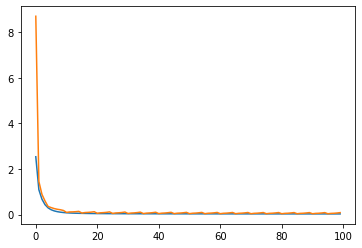

Test Error:
1.285104485251752


In [44]:

#Training
#Lambda = 0.2,0.4,0.6
a,b,q,p,y_f = SGD(it, nu, a, b, q, p, y_f, train_error, val_error, train_set,learning_rate = 0.05, lambda_val = 0, start_it = 0)
#Test

test_error(nu, a, b, q, p,y_f, test_set)


In [45]:
test_error(nu, a, b, q, p,y_f, test_set)

Test Error:
1.285104485251752
